In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px

pinguins = sns.load_dataset('penguins')
pinguins.info()

# remove todas as linhas com valor nulo (null values)
df = pinguins.dropna()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


C:\Users\Priscila\AppData\Local\Temp\ipykernel_24704\4129124699.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



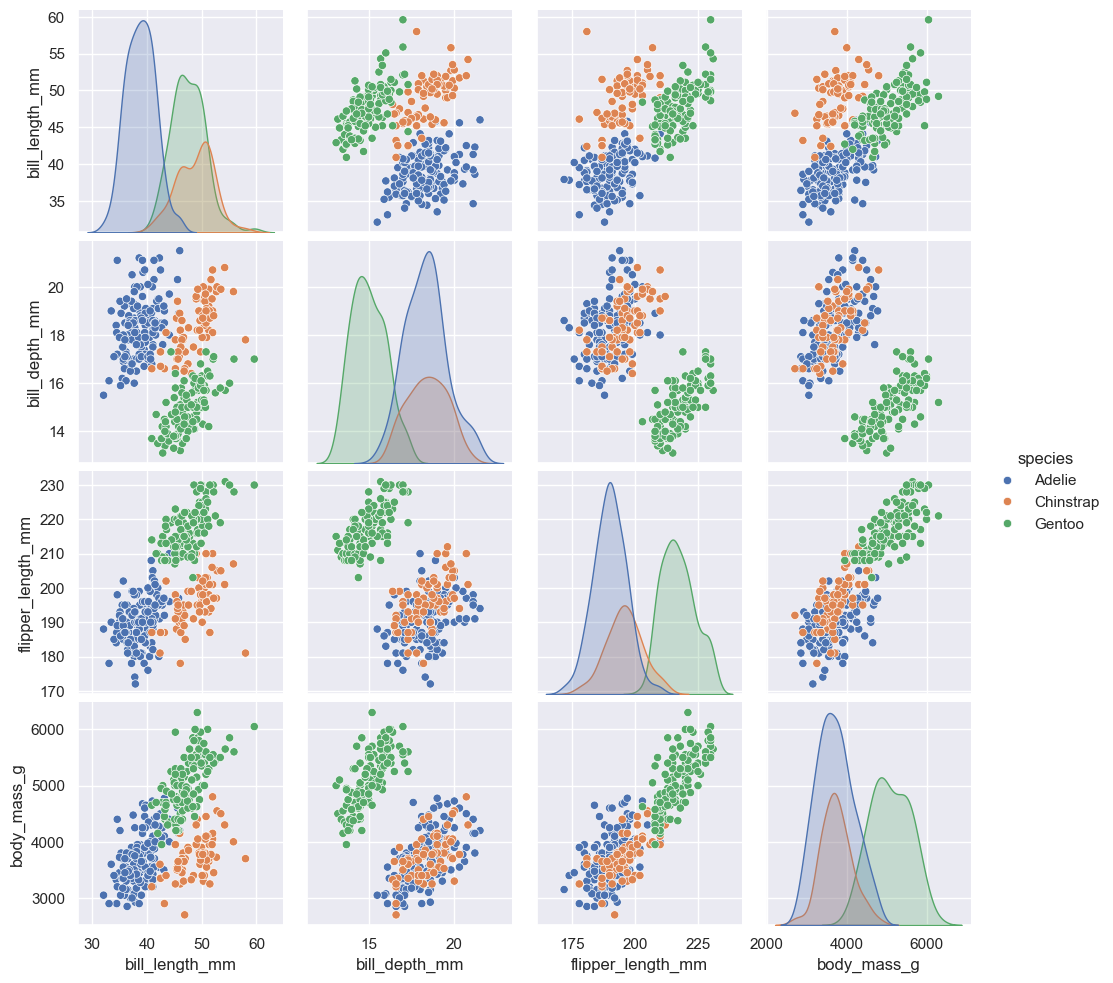

In [17]:
df['species'] = pinguins.species
sns.pairplot(df, hue='species', palette="deep")

<Axes: >

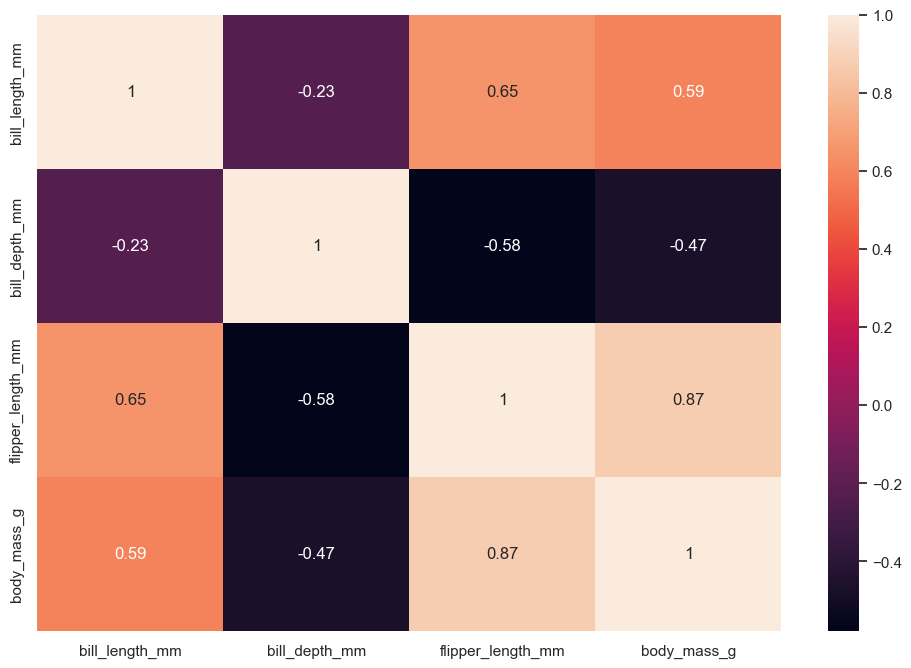

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.iloc[:,2:-1].corr(), annot=True)

In [19]:
encoder = LabelEncoder()
especies = encoder.fit_transform(df.iloc[:,0:1])
print(especies)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


C:\Users\Priscila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



333


<Axes: title={'center': '2D com correção de escala'}>

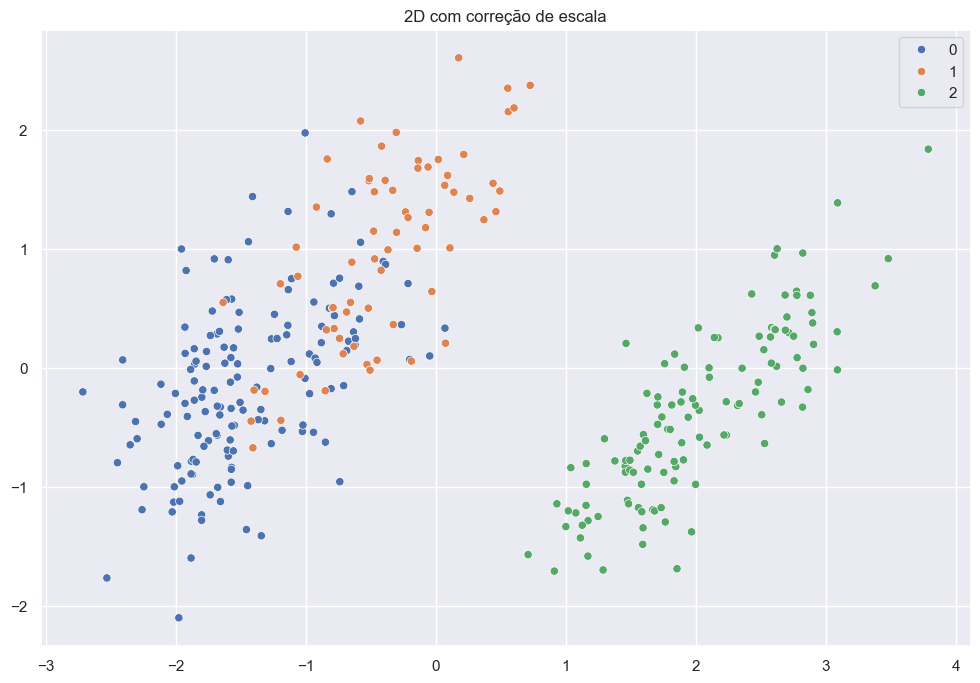

In [20]:
scaler = StandardScaler()
padronizado = scaler.fit_transform(df.iloc[:,2:-1])
pca = PCA(n_components=2)
dados = pca.fit_transform(padronizado)
print(len(dados))
plt.title("2D com correção de escala")
sns.scatterplot(x=dados[:,0], y =dados[:,1], hue=especies, palette="deep")

In [24]:
pca = PCA(n_components=3)
dados = pca.fit_transform(padronizado)
px.scatter_3d(x=dados[:,0], y=dados[:,1], z=dados[:,2], color=especies, title="3D com correção de escala")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>z=%{z}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0, 0, 0, ..., 2, 2, 2]),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([-1.85359302, -1.31625406, -1.37660509, ...,  2.75150503,  1.71385366,
                           2.01853683]),
              'y': array([ 0.03206938, -0.44352677, -0.16123048, ...,  0.26655572, -0.72587516,
                           0.33655372]),
              'z': array([-0.23490166, -0.02747008,  0.18968926, ..., -0.4193065 , -0.26276382,
                          -0.15533072])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'x'}},
                         'yaxis': {'title': {'text': 'y'}},
                         'zaxis': {'title': {'text': 'z'}}},
               'template': '...',
               'title': {'text': '3D com correção de escala'}}
})

333


<Axes: title={'center': '2D sem correção de escala'}>

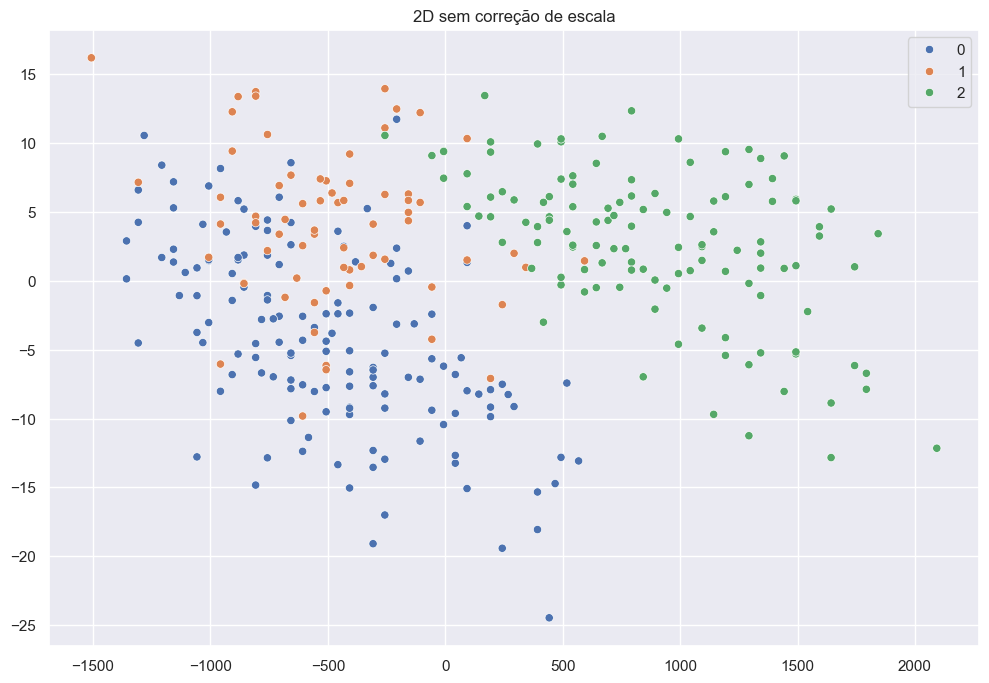

In [22]:
pca = PCA(n_components=2)
dados = pca.fit_transform(df.iloc[:,2:-1])
print(len(dados))
plt.title("2D sem correção de escala")
sns.scatterplot(x=dados[:,0], y =dados[:,1], hue=especies, palette="deep")
